#  general API quickstart

In [10]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})
print('Running on PyMC3 v{}'.format(pm.__version__))


Running on PyMC3 v3.8


In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

In [6]:
print(model.basic_RVs, model.free_RVs,model.observed_RVs)

[mu, obs] [mu] [obs]


In [7]:
model.logp({"mu":0})

array(-144.65738317)

#  transformation

In [8]:
import pymc3.distributions.transforms as tr

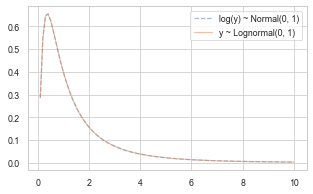

In [11]:
class Exp(tr.ElemwiseTransform):
    name = "exp"

    def backward(self, x):
        return tt.log(x)

    def forward(self, x):
        return tt.exp(x)

    def jacobian_det(self, x):
        return -tt.log(x)


with pm.Model() as model:
    x1 = pm.Normal('x1', 0., 1., transform=Exp())
    x2 = pm.Lognormal('x2', 0., 1.)

lognorm1 = model.named_vars['x1_exp__']
lognorm2 = model.named_vars['x2']

_, ax = plt.subplots(1, 1, figsize=(5, 3))
x = np.linspace(0., 10., 100)
ax.plot(
    x,
    np.exp(lognorm1.distribution.logp(x).eval()),
    '--',
    alpha=.5,
    label='log(y) ~ Normal(0, 1)')
ax.plot(
    x,
    np.exp(lognorm2.distribution.logp(x).eval()),
    alpha=.5,
    label='y ~ Lognormal(0, 1)')
plt.legend();

#  Sampler 

In [12]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

    trace = pm.sample(1000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 1773.63draws/s]


In [13]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

    trace = pm.sample(cores=4)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1512.44draws/s]


In [14]:
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'Metropolis',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PoissonProposal',
 'Slice']

In [15]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [mu]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:01<00:00, 2385.81draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [16]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.HalfNormal('sd', sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=sd, observed=np.random.randn(100))

    step1 = pm.Metropolis(vars=[mu])
    step2 = pm.Slice(vars=[sd])
    trace = pm.sample(10000, step=[step1, step2], cores=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:28<00:00, 1472.41draws/s]
The number of effective samples is smaller than 25% for some parameters.


/Users/Toshiaki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/Toshiaki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c212f1f98>,
      dtype=object)

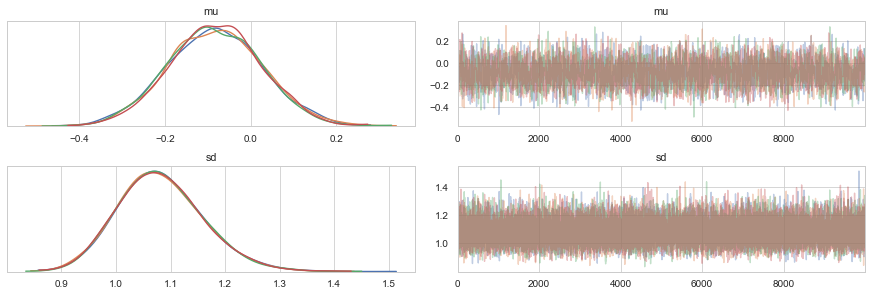

In [17]:
pm.traceplot(trace)

In [18]:
pm.gelman_rubin(trace)

/Users/Toshiaki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.002
    sd       float64 1.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c21e26e10>],
      dtype=object)

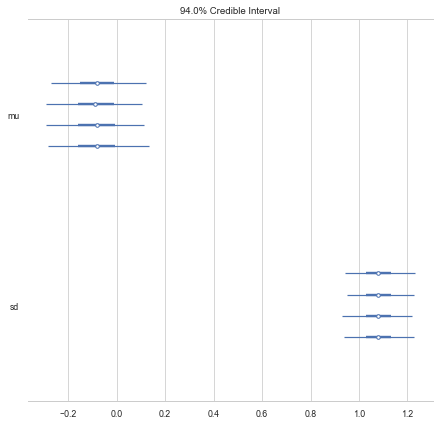

In [19]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c223c2fd0>,
      dtype=object)

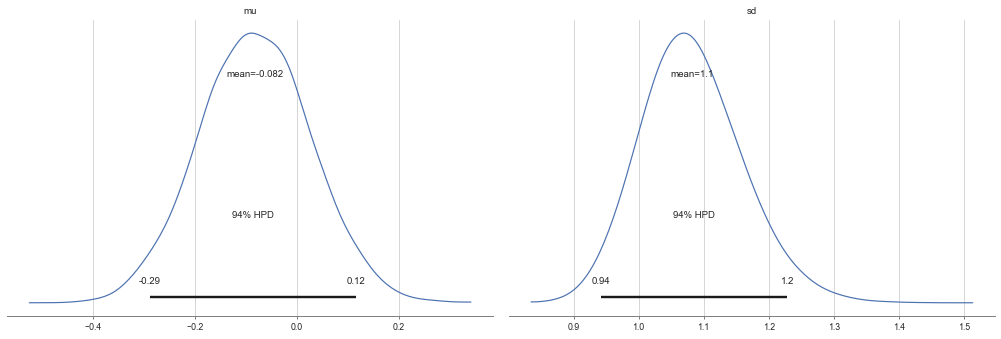

In [20]:
pm.plot_posterior(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1027.71draws/s]


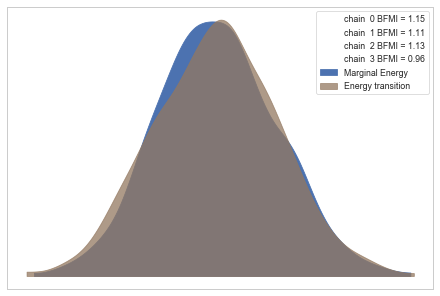

In [22]:
with pm.Model() as model:
    x = pm.Normal('x', mu=0, sigma=1, shape=100)
    trace = pm.sample(cores=4)

pm.energyplot(trace)